# 4 链表与数组
## 4.1数组

数组array是一种线性的数据结构，其将相同类型的元素存储在连续的内存空间中。我们将元素在数组中的位置称为该元素的索引index。下图主要展示了数组的主要概念和存储方式。
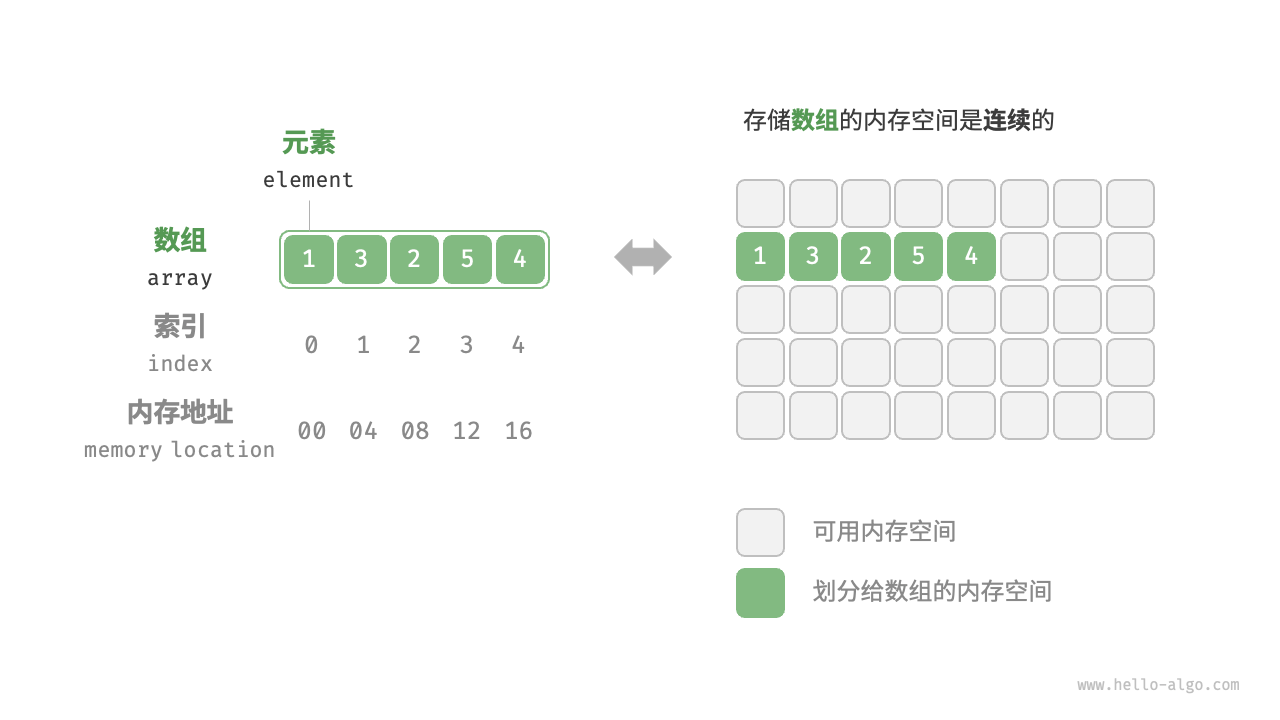

### 4.1.1数组的常用操作
1.初始化数组
我们可以根据需求选用数组的两种初始化方式：无初始值，给定初始值。在未指定初始值的情况下，大多数编程语言会将数组元素初始化为0：

In [8]:
//初始化数组
var arr [5]int
// 在go语言中 指定长度时([5]int)是数组，不指定长度的时候是切片([]int)
// 为了方便实现扩容后extend()方法，以下将切片(slice)看作数组array。
var nums = []int{1, 2, 3, 4, 5}

2.访问元素
数组元素被存储在连续的内存空间中，这意味着计算数组元素的内存地址非常容易。给定数组内存地址（首元素内存地址）和某个元素的索引，我们可以利用下图所示公式来计算得到该内存的元素地址，从而直接访问这个元素。
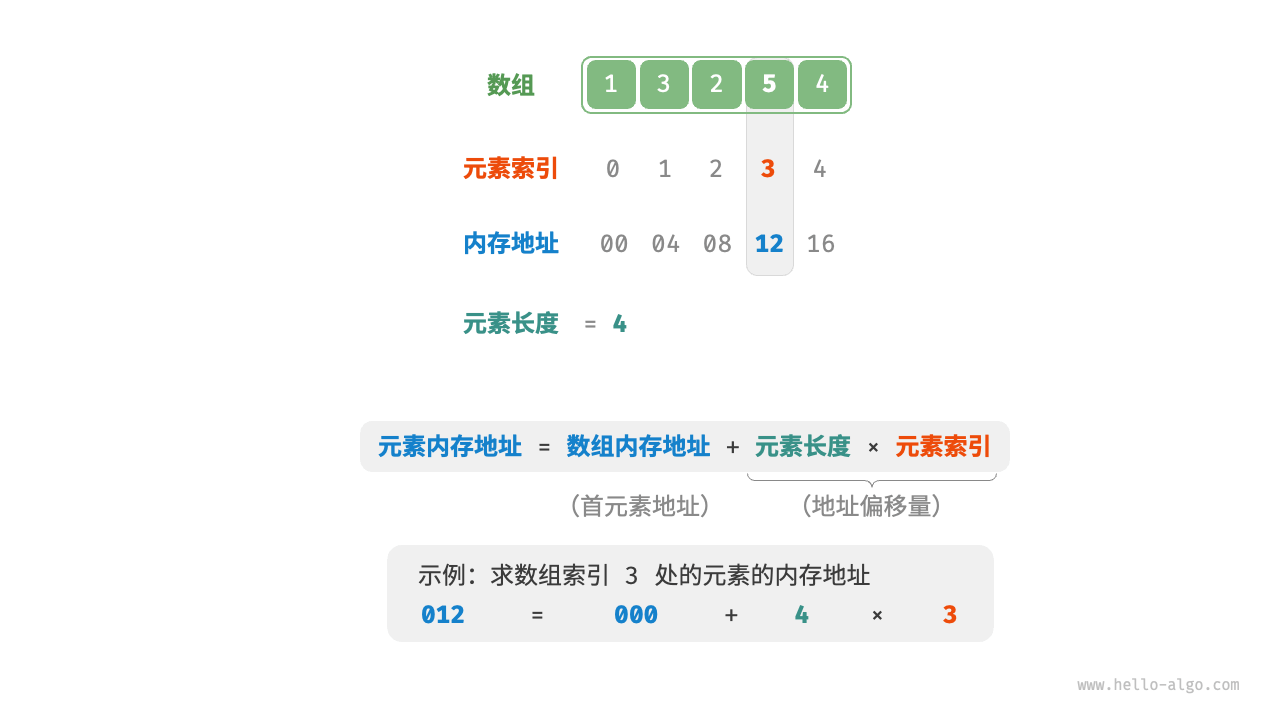
观察这个图像，我们可以发现数组首个元素的索引为0，这是因为从计算公式上来看，**索引本质上是内存地址的偏移量**。首个元素的地址偏移量是0，因此它的索引为0是合理的。
在数组中访问元素是非常高效的，基本上我们可以在O(1)时间内随机访问数组中的任意一个元素。


In [9]:
// 随机访问元素
func randomAccess(nums []int) (randomNum int) {
	// 在区间[0,nums.length]中随机抽取一个数字
	randomIndex := rand.Intn(len(nums))
	// 获取并返回随机元素
	randomNum = nums[randomIndex]
	return
}

3.插入元素
数组元素在内存中是紧挨着的，他们之间没有空间再存放任何数据，如下图所示，如果想在数组中间插入一个元素，则需要将该元素之后的所有元素都向后移动一位，之后再把元素赋值给索引。
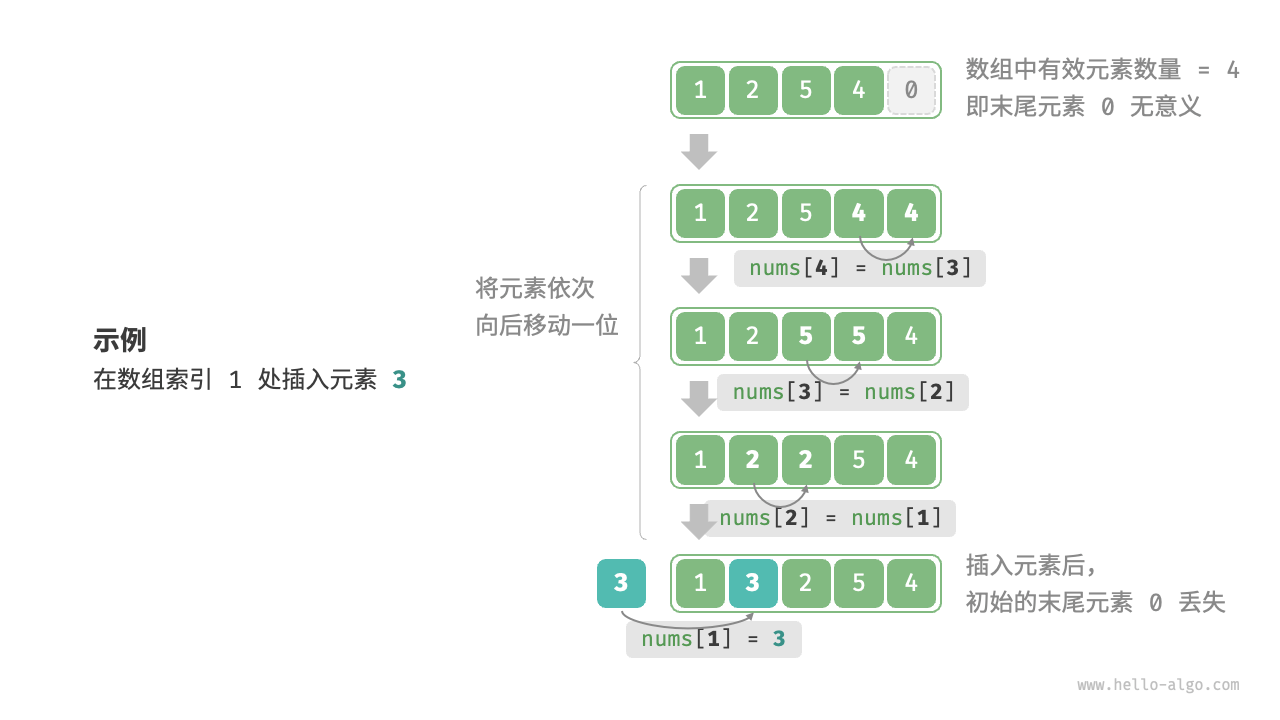
值得注意的是，由于数组的长度是固定的，因此插入一个元素必定会导致数组尾部元素丢失，我们把这个问题的解决方法留在列表章节讨论。


In [11]:
func insert(nums []int , num int ,index int) {
	for i := len(nums) - 1;i > index ;i--{
		nums[i] = nums[i-1]
	}
	nums[index] = num
}

4.删除元素
同理 ，想要删除索引i处的元素，我们需要把索引i之后的元素都向前移动一位。
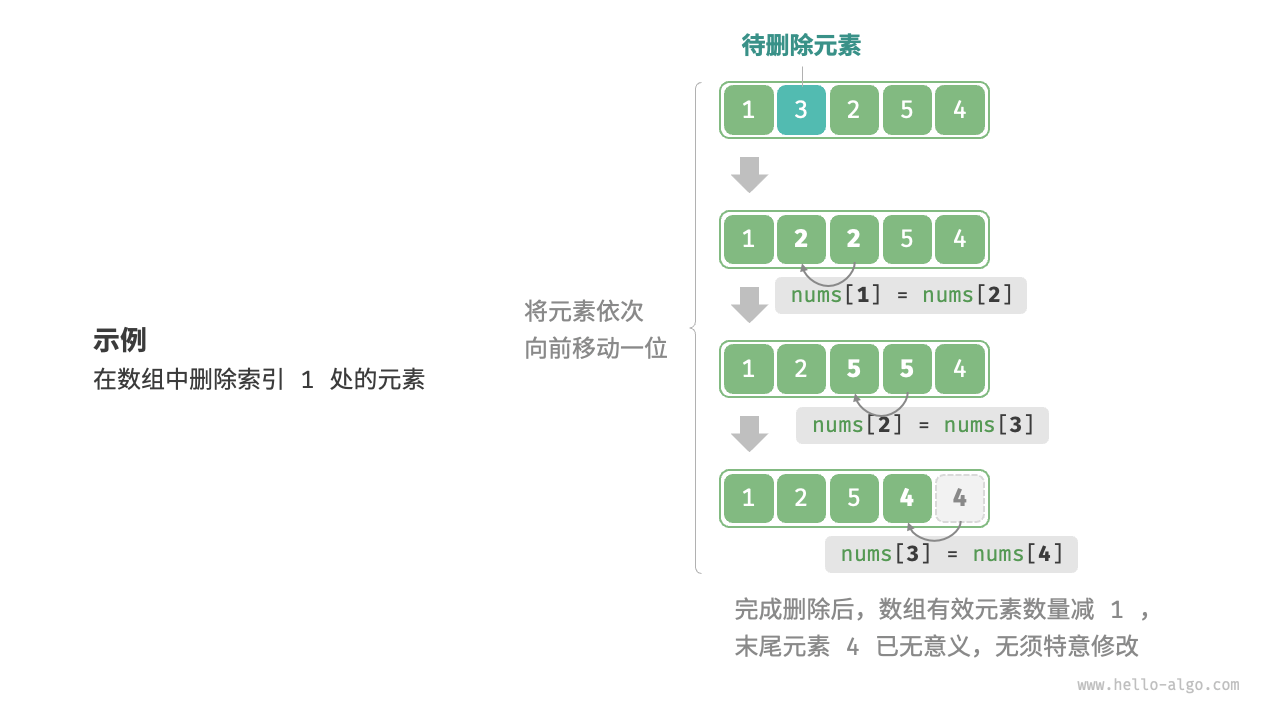
注意，删除元素完成之后，原先末尾的元素变得没有意义了，所以我们不用特意去修改它。


In [ ]:
func remove(nums []int , index int){
	for i:= index; i < len(nums) - 1 ; i++{
		nums[i] = nums[i+1]
	}
}

总体来看，数组的插入与删除操作有以下缺点：
- 时间复杂度高： 数组的插入和删除的平均时间复杂度均为O(n),其中n为数组长度。
- 丢失元素：由于数组的长度不可变，因此再插入元素后，超出数组长度范围的元素会丢失。
- 内存浪费：我们虽然可以初始化一个比较长的数组，可以先只用前面一部分，这样再插入数据时，丢失的末尾元素都是无意义的，but这样会造成部分内存空间浪费。

5.遍历数组
在大多数编程语言中，我们可以通过索引遍历数组，也可以直接遍历获取数组中的每个元素


In [ ]:
func traverse(nums []int) {
	count := 0
	// 1.通过索引遍历
	for i := 0 ; i < len(nums) ; i++{
		count += nums[i]		
	}
	count = 0
	//2.通过元素遍历
	for _,num := range nums{
		count += num
	}
	count = 0
	//3.同时通过索引与元素遍历
	for i,num := range nums{
		count += nums[i]
		count += num
	}
}

6.查找元素
在数组中查找指定元素需要遍历数组，每轮判断元素值是否匹配，如果匹配那么久输出对应索引。
因为数组是线性数据结构，所以上述查找操作被称为“线性查找”



In [ ]:
func find(nums []int, target int) (index int){
	index = -1
	for i := 0 ; i < len(nums) ; i++{
		if nums[i] == target{
			index = i
			break
		}
	}
	return index
}

7.扩容数组
在复杂的系统环境中，程序难以保证数组之后的内存空间是可用的，从而无法安全地扩展数组容量。因此在大多数编程语言中，数组的长度是不可变的。
如果我们希望扩容数组，那么就需要重新简历一个更大的数组，然后把原数组元素一次复制到新数组，这是一个O(n)的操作，在数组很大的情况下非常耗时间

In [ ]:
func extend(nums []int, enlarge int) []int {
//我们先初始化一个扩展长度后的数组
res := make([]int, len(nums)+enlarge)
//将原数组中所有元素复制到新数组中
for i := 0;i < len(nums);i++{
	res[i] = nums[i]
}
return res
}

## 4.1.2数组的优点与局限性

数组存储在连续的内存空间内，且元素类型相同。这种做法包含丰富的先验信息，系统可以利用这些信息来优化数据结构的操作效率。

- **空间效率高**：数组为数据分配了连续的内存块，无须额外的结构开销。
- **支持随机访问**：数组允许在 $O(1)$ 时间内访问任何元素。
- **缓存局部性**：当访问数组元素时，计算机不仅会加载它，还会缓存其周围的其他数据，从而借助高速缓存来提升后续操作的执行速度。

连续空间存储是一把双刃剑，其存在以下局限性。

- **插入与删除效率低**：当数组中元素较多时，插入与删除操作需要移动大量的元素。
- **长度不可变**：数组在初始化后长度就固定了，扩容数组需要将所有数据复制到新数组，开销很大。
- **空间浪费**：如果数组分配的大小超过实际所需，那么多余的空间就被浪费了。

## 4.1.3数组典型应用

数组是一种基础且常见的数据结构，既频繁应用在各类算法之中，也可用于实现各种复杂数据结构。

- **随机访问**：如果我们想随机抽取一些样本，那么可以用数组存储，并生成一个随机序列，根据索引实现随机抽样。
- **排序和搜索**：数组是排序和搜索算法最常用的数据结构。快速排序、归并排序、二分查找等都主要在数组上进行。
- **查找表**：当需要快速查找一个元素或其对应关系时，可以使用数组作为查找表。假如我们想实现字符到 ASCII 码的映射，则可以将字符的 ASCII 码值作为索引，对应的元素存放在数组中的对应位置。
- **机器学习**：神经网络中大量使用了向量、矩阵、张量之间的线性代数运算，这些数据都是以数组的形式构建的。数组是神经网络编程中最常使用的数据结构。
- **数据结构实现**：数组可以用于实现栈、队列、哈希表、堆、图等数据结构。例如，图的邻接矩阵表示实际上是一个二维数组。